# Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Database

In [3]:
url = ['https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx']

In [4]:
online = pd.read_excel(url[0])

In [5]:
online.dropna(subset=['Customer ID'], inplace = True)

# Functions

<ul>
 <li>Function that takes a date as input and returns month format</li>
</ul>

In [6]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

<ul>
 <li>Function that takes a date as input and returns year, month and firts day</li>
</ul>

In [7]:
def get_date_int(df, column):
    
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day

    return year, month, day

# Organizing Database

<ul>
 <li>Transforms <i>Invoce Date</i> to <i>Invoce Month Format.</i></li>
</ul>

In [8]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

<ul>
 <li>Assigns each customer its corresponding cohort.</li>
</ul>

In [9]:
grouping = online.groupby('Customer ID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')

<ul>
 <li>Splits <i>Invoice Date</i> and <i>Cohort Date</i> by Year, Month and Day.</li>
</ul>

In [10]:
invoice_year, invoice_month, _ = get_date_int(online,'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online,'CohortMonth')

<ul>
 <li>Calculates the difference between invoce year/month and cohort year/month in order to calculate periods.</li>
</ul>

In [11]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

<ul>
 <li>Calculates the number of periods between the first purchase until the last one.</li>
</ul>

In [12]:
online['CohortIndex'] = years_diff * 12 + months_diff + 1

<ul>
 <li>Groups cohorts and the active users of each by monthly periods.</li>
</ul>

In [13]:
grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot_table(index='CohortMonth',columns='CohortIndex',values='Customer ID')

<ul>
 <li><i>Monthly Cohort</i> and <i>Active Cohort Active Users</i> by period.</li>
</ul>

In [14]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,452.0,518.0,260.0
2010-01-01,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,122.0,37.0,NaN
2010-02-01,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,32.0,NaN,NaN
2010-03-01,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,36.0,NaN,NaN,NaN
2010-04-01,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,22.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,49.0,45.0,49.0,48.0,66.0,56.0,22.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,269.0,58.0,53.0,55.0,62.0,76.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,183.0,38.0,37.0,52.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,158.0,39.0,50.0,51.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Retention Rate

<ul>
 <li>Number of users by <i>Monthly Cohort.</i></li>
</ul>

In [15]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes 

CohortMonth
2009-12-01    1045.0
2010-01-01     394.0
2010-02-01     363.0
2010-03-01     436.0
2010-04-01     291.0
2010-05-01     254.0
2010-06-01     269.0
2010-07-01     183.0
2010-08-01     158.0
2010-09-01     242.0
2010-10-01     379.0
2010-11-01     322.0
2010-12-01      47.0
Name: 1, dtype: float64

<ul>
 <li>Monthly Retention Rate</li>
</ul>

In [16]:
retention = cohort_counts.divide(cohort_sizes, axis = 0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,37.5,34.3,42.8,39.2,39.0,39.0,35.8,34.0,37.5,43.3,49.6,24.9
2010-01-01,100.0,21.8,30.2,30.5,27.9,29.2,26.6,23.1,28.9,34.0,31.0,9.4,NaN
2010-02-01,100.0,30.0,22.6,30.3,25.6,20.9,21.8,28.4,27.5,29.2,8.8,NaN,NaN
2010-03-01,100.0,21.8,25.9,23.6,22.9,20.0,24.1,29.8,28.9,8.3,NaN,NaN,NaN
2010-04-01,100.0,23.0,19.9,16.2,18.6,23.0,27.1,26.1,7.6,NaN,NaN,NaN,NaN
2010-05-01,100.0,19.3,17.7,19.3,18.9,26.0,22.0,8.7,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,21.6,19.7,20.4,23.0,28.3,7.4,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,20.8,20.2,28.4,30.1,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,24.7,31.6,32.3,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graph

<ul>
 <li>Monthly Retention Rate</li>
</ul>

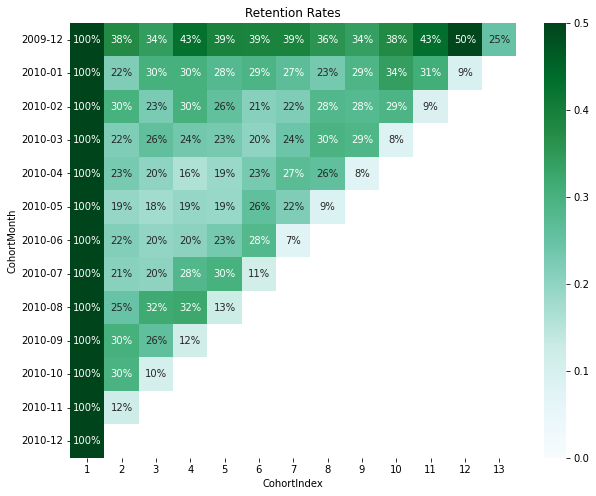

In [26]:
retention.index = retention.index.strftime("%Y-%m")

plt.figure(figsize= (10,8))
plt.title('Retention Rates')

sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn')

plt.show()

<ul>
 <li>Average Quantity by Cohort</li>
</ul>

In [41]:
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity = average_quantity.round(1)

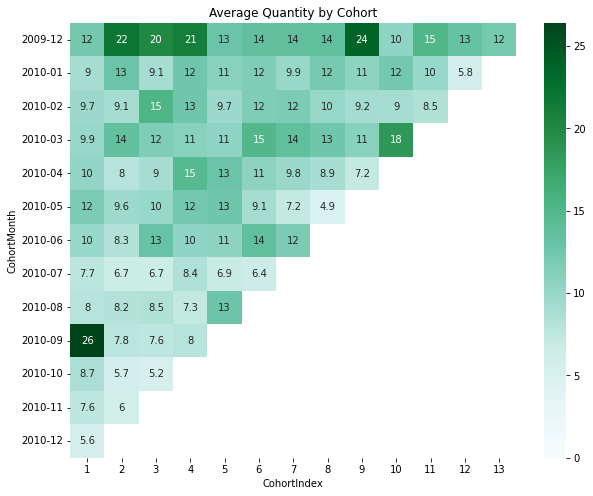

In [42]:
average_quantity.index = average_quantity.index.strftime("%Y-%m")
max = average_quantity.max(axis = 0).max()

plt.figure(figsize= (10,8))
plt.title('Average Quantity by Cohort')

sns.heatmap(data = average_quantity,
            annot = True,
            vmin = 0.0,
            vmax = max,
            cmap = 'BuGn')

plt.show()